In [18]:
# unique_customers = data['Customer ID'].unique()
# random_age = np.random.randint(18, 71, size=len(unique_customers))
# random_salary = np.random.randint(20000, 100001, size=len(unique_customers))

# # Create a DataFrame for random ages and salaries
# customer_info = pd.DataFrame({'Customer ID': unique_customers, 'Age': random_age, 'Salary': random_salary})

# # Merge the customer info DataFrame with the main DataFrame
# data = pd.merge(data, customer_info, on='Customer ID', how='left')
# data.to_csv("newData.csv")

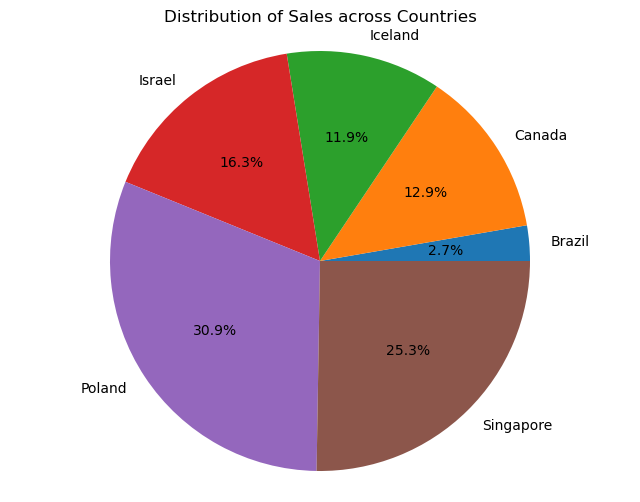

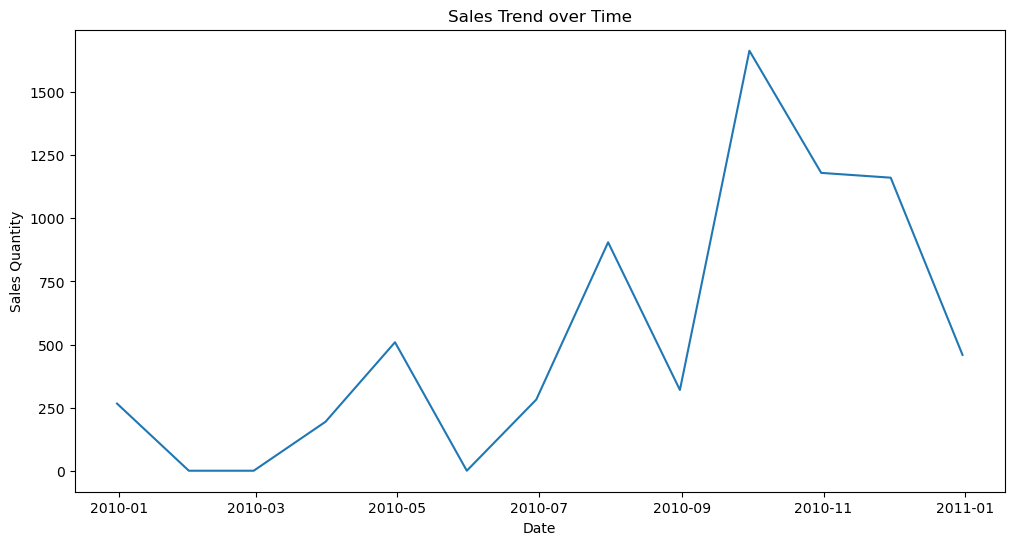

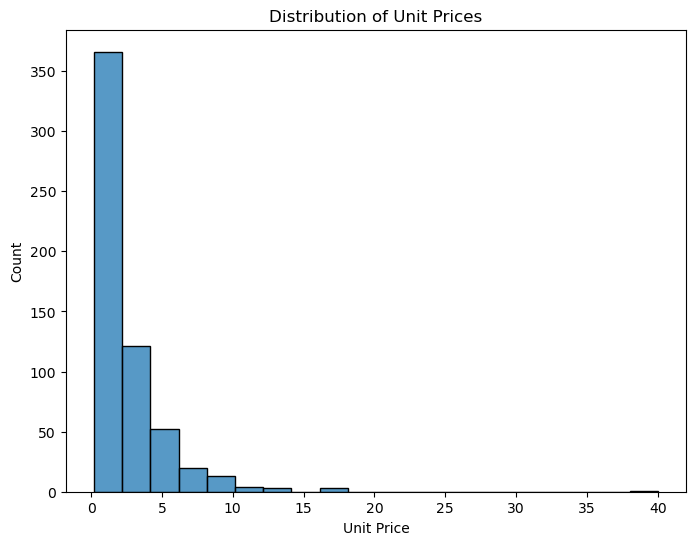

Mean Unit Price: 2.6172555746140653
Median Unit Price: 1.65
Mode Unit Price: 1.25
Mean Quantity: 11.90394511149228
Median Quantity: 12.0
Mode Quantity: 12
Range of Unit Prices: 39.79
Variance of Unit Prices: 7.973245032507489
Standard Deviation of Unit Prices: 2.8236935089537405
25th Percentile of Quantities: 6.0
50th Percentile (Median) of Quantities: 12.0
75th Percentile of Quantities: 12.0


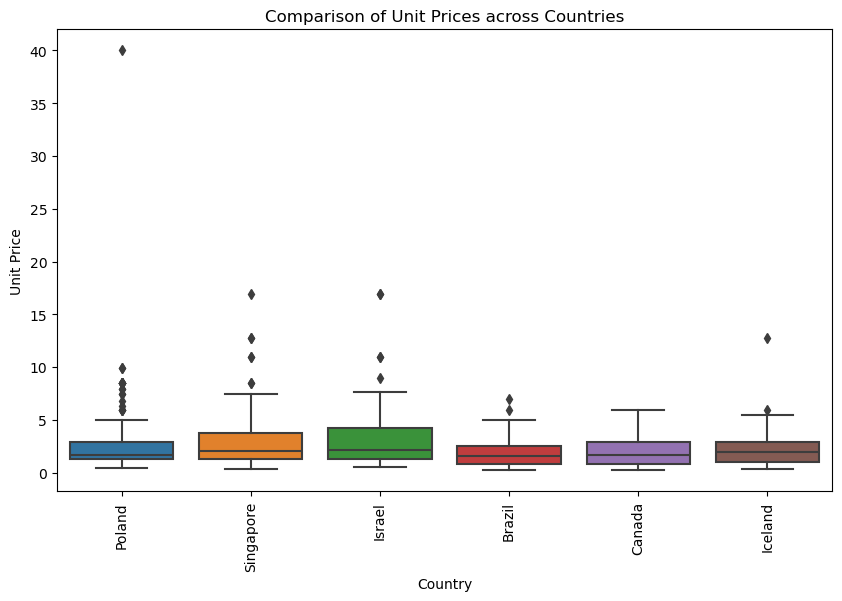

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('./Example .csv')

# Data Cleaning and Preprocessing
data = data[~data['InvoiceNo'].str.contains('C', na=False)]  # Remove canceled transactions
data = data[data['Quantity'] > 0]  # Remove entries with zero quantity
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Convert InvoiceDate to datetime format

# Data Visualization
# Pie Chart: Distribution of Sales across Countries to understand the geographical spread of customers.
country_sales = data.groupby('Country')['Quantity'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(country_sales['Quantity'], labels=country_sales['Country'], autopct='%1.1f%%')
plt.title('Distribution of Sales across Countries')
plt.axis('equal')
plt.show()


# Line Graph: Sales Trend over Time to identify any seasonal patterns or growth/decline.
sales_trend = data.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['InvoiceDate'], sales_trend['Quantity'])
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Trend over Time')
plt.show()

# Histogram: Distribution of Unit Prices to understand the typical range and identify any outliers.
plt.figure(figsize=(8, 6))
sns.histplot(data['UnitPrice'], bins=20)
plt.xlabel('Unit Price')
plt.ylabel('Count')
plt.title('Distribution of Unit Prices')
plt.show()

# Summary Statistics
print('Mean Unit Price:', data['UnitPrice'].mean())
print('Median Unit Price:', data['UnitPrice'].median())
print('Mode Unit Price:', data['UnitPrice'].mode()[0])

print('Mean Quantity:', data['Quantity'].mean())
print('Median Quantity:', data['Quantity'].median())
print('Mode Quantity:', data['Quantity'].mode()[0])

print('Range of Unit Prices:', data['UnitPrice'].max() - data['UnitPrice'].min())
print('Variance of Unit Prices:', data['UnitPrice'].var())
print('Standard Deviation of Unit Prices:', data['UnitPrice'].std())

print('25th Percentile of Quantities:', data['Quantity'].quantile(0.25))
print('50th Percentile (Median) of Quantities:', data['Quantity'].quantile(0.5))
print('75th Percentile of Quantities:', data['Quantity'].quantile(0.75))

# Box Plot: Comparison of Unit Prices across Countries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='UnitPrice', data=data)
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.title('Comparison of Unit Prices across Countries')
plt.xticks(rotation=90)
plt.show()

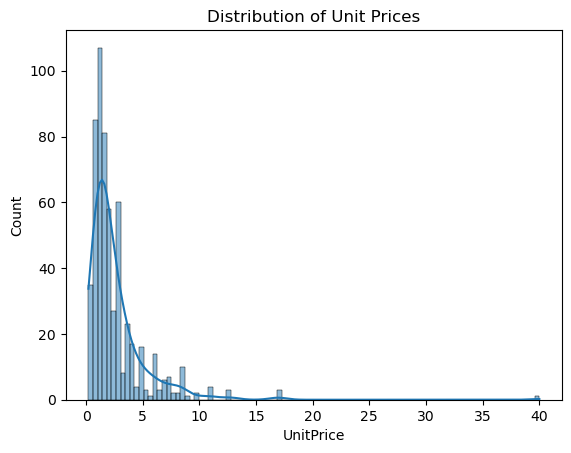

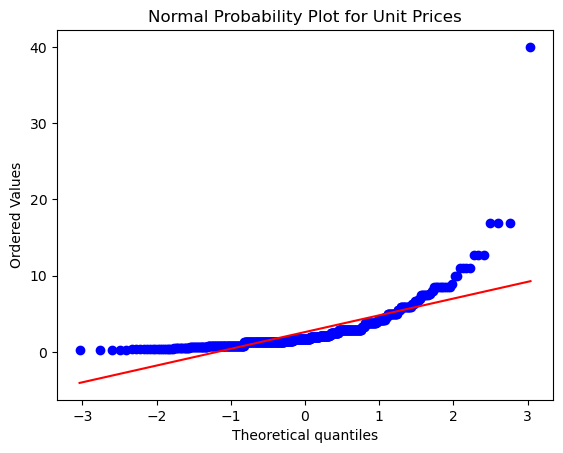

Shapiro-Wilk Test for Normality (UnitPrices):
ShapiroResult(statistic=0.6064472198486328, pvalue=2.5178418595491445e-34)
Sample Mean of Unit Prices: 2.62
Sample Standard Deviation of Unit Prices: 2.82
Test Statistic: -11.82, p-value: 0.0000
One-way ANOVA F-statistic: 4.02, p-value: 0.0014
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     55.38
Date:                Wed, 01 May 2024   Prob (F-statistic):           3.59e-13
Time:                        12:39:16   Log-Likelihood:                -2105.7
No. Observations:                 583   AIC:                             4215.
Df Residuals:                     581   BIC:                             4224.
Df Model:                           1                                         

In [2]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Univariate Analysis
# Unit Price Distribution
sns.histplot(data['UnitPrice'], kde=True)
plt.title('Distribution of Unit Prices')
plt.show()

# Normality Test for Unit Prices
stats.probplot(data['UnitPrice'], plot=plt)
plt.title('Normal Probability Plot for Unit Prices')
plt.show()

print('Shapiro-Wilk Test for Normality (UnitPrices):')
print(stats.shapiro(data['UnitPrice']))

# Estimate Parameters and Test Hypotheses (Unit Prices)
unit_price_mean = data['UnitPrice'].mean()
unit_price_std = data['UnitPrice'].std()
sample_size = len(data['UnitPrice'])

print(f'Sample Mean of Unit Prices: {unit_price_mean:.2f}')
print(f'Sample Standard Deviation of Unit Prices: {unit_price_std:.2f}')

# Hypothesis Test: Population Mean Unit Price = 4
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(data['UnitPrice'], 4)
print(f'Test Statistic: {tset:.2f}, p-value: {pval:.4f}')

# Multivariate Analysis

# Categorical vs. Numerical: One-way ANOVA to compare the mean unit prices across different countries
country_groups = data.groupby('Country')['UnitPrice'].apply(list)
f_stat, p_val = stats.f_oneway(*country_groups)
print(f'One-way ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}')

# Numerical vs. Numerical: Simple Linear Regression 
model = ols('Quantity ~ UnitPrice', data=data).fit()
print(model.summary())

# Correlation Analysis
print('Correlation Matrix:')
print(data[['Quantity', 'UnitPrice']].corr())

In [24]:
df = pd.read_csv("newData.csv")

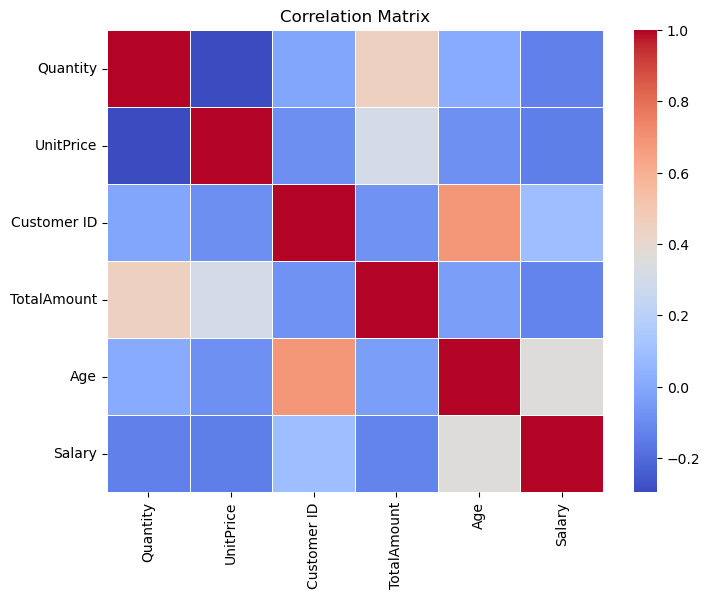

In [25]:
# import seaborn as sns
# df["TotalSpent"] = df["Quantity"]*df["UnitPrice"]
# sns.heatmap(df[["Quantity","UnitPrice","TotalSpent"]].corr())
# print(df[["Quantity","UnitPrice","TotalSpent"]].corr())

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

correlation_data = df[['Quantity', 'UnitPrice', 'Customer ID', 'TotalAmount', "Age", "Salary"]]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


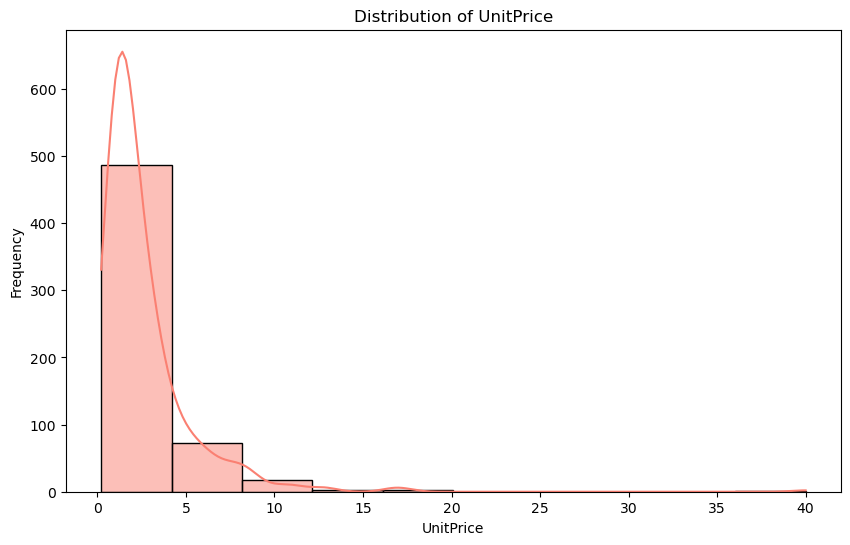

Quantity: Mean = 11.90394511149228, Median = 12.0, Std = 9.386198551115807
UnitPrice: Mean = 2.6172555746140653, Median = 1.65, Std = 2.8236935089537405


In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='UnitPrice', bins=10, kde=True, color='salmon')
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# Estimate parameters (mean, median, standard deviation) for Quantity and UnitPrice
quantity_mean = data['Quantity'].mean()
quantity_median = data['Quantity'].median()
quantity_std = data['Quantity'].std()

unit_price_mean = data['UnitPrice'].mean()
unit_price_median = data['UnitPrice'].median()
unit_price_std = data['UnitPrice'].std()

print(f"Quantity: Mean = {quantity_mean}, Median = {quantity_median}, Std = {quantity_std}")
print(f"UnitPrice: Mean = {unit_price_mean}, Median = {unit_price_median}, Std = {unit_price_std}")

Linear Regression:
Mean Squared Error: 203.63
R-squared: 0.58

Decision Tree Regression:
Mean Squared Error: 2485.35
R-squared: -4.17

Random Forest Regression:
Mean Squared Error: 151.79
R-squared: 0.68

Linear Regression Predictions:
[34.69862976 88.88619605 77.80661462]

Decision Tree Regression Predictions:
[ 44.55  51.   183.6 ]

Random Forest Regression Predictions:
[ 48.5335  44.529  164.299 ]



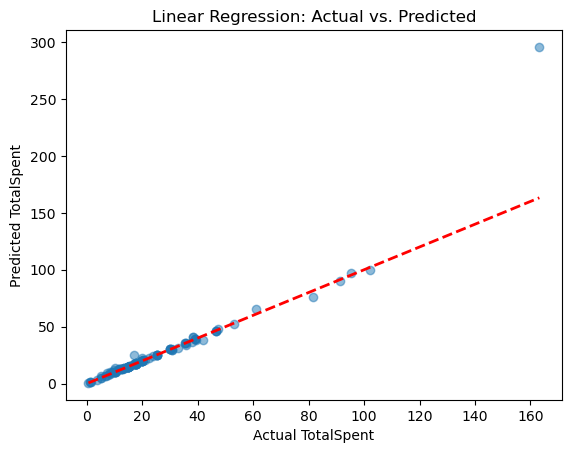

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on which customers are most likely to make high-value purchases
# Feature Engineering
data['TotalSpent'] = data['Quantity'] * data['UnitPrice']  # Calculate total spent per transaction
data['CustomerType'] = pd.cut(data['TotalSpent'], bins=[0, 10, 50, 100, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])  # Create a customer type variable based on total spent

# Split the data into features and target
X = data[['Quantity', 'UnitPrice']]
y = data['TotalSpent']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print()

# Make predictions on new data
new_data = pd.DataFrame({'Quantity': [10, 5, 20], 'UnitPrice': [5, 15, 8]})
for name, model in models.items():
    predictions = model.predict(new_data)
    print(f'{name} Predictions:')
    print(predictions)
    print()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual TotalSpent')
plt.ylabel('Predicted TotalSpent')
plt.title('Linear Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()    

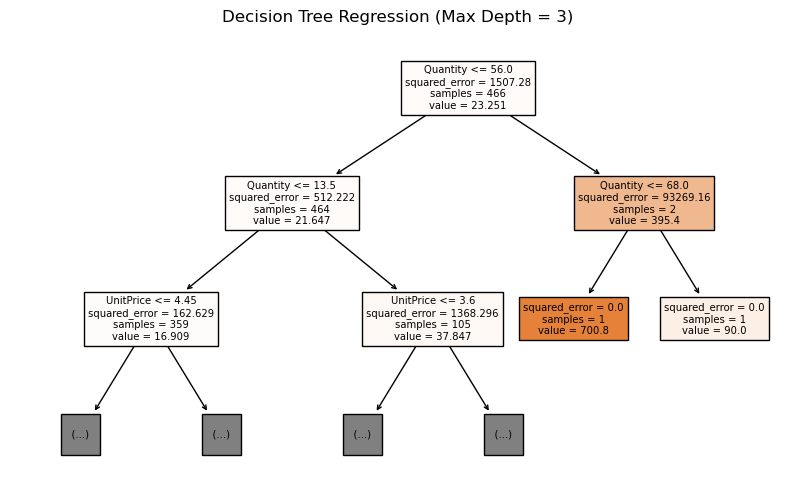

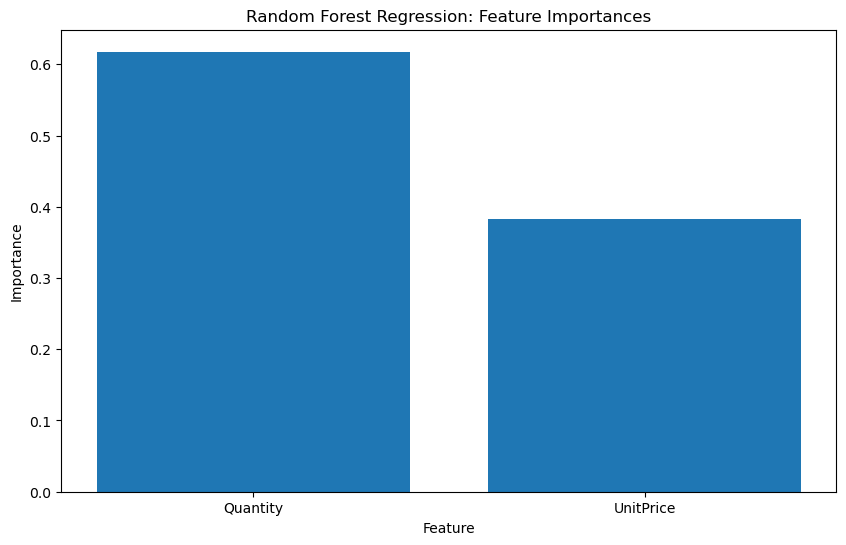

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np
# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(models['Decision Tree Regression'], max_depth=2, feature_names=X.columns, filled=True)
plt.title('Decision Tree Regression (Max Depth = 3)')
plt.show()

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
feat_importances = models['Random Forest Regression'].feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.bar(range(X.shape[1]), feat_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regression: Feature Importances')
plt.show()

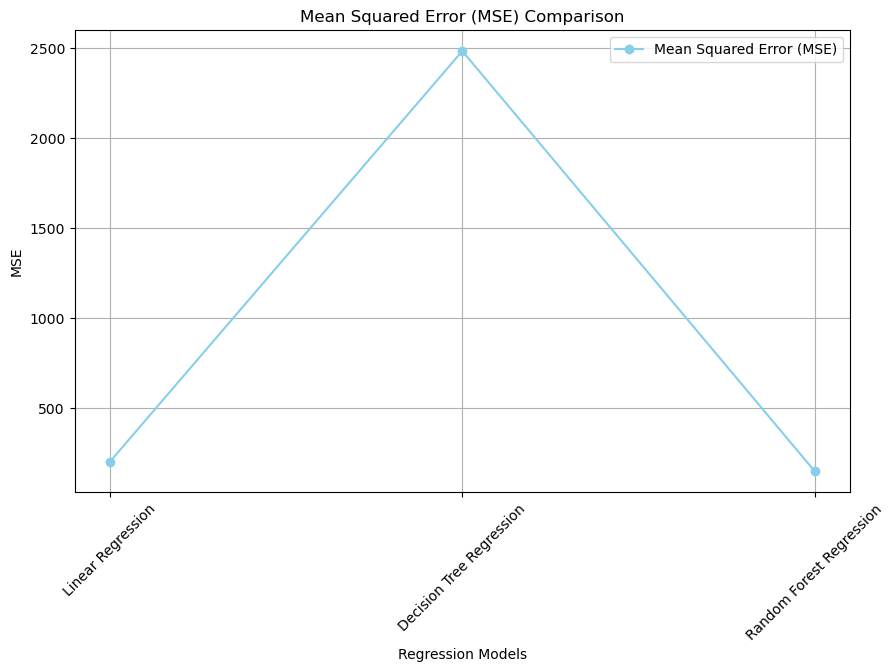

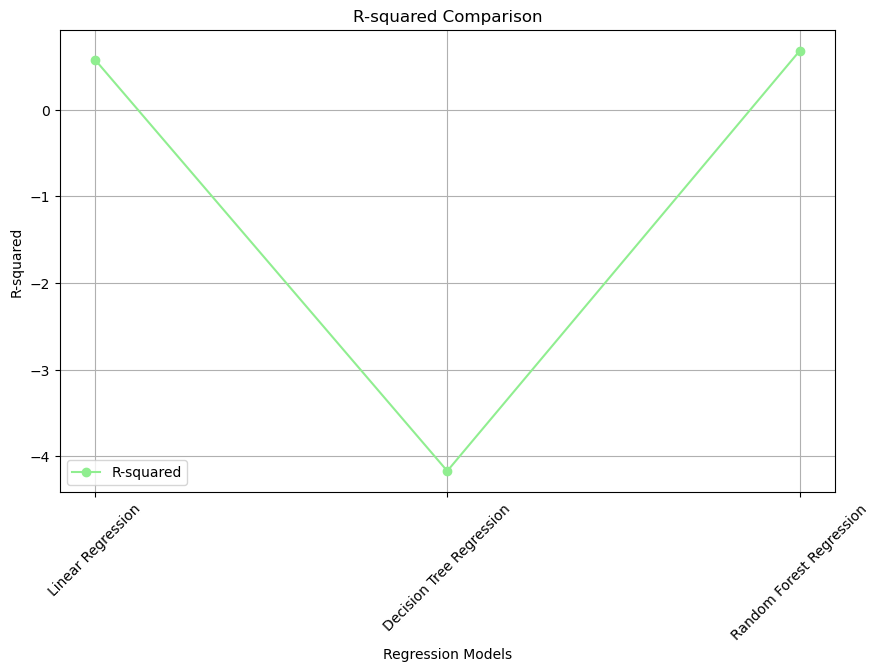

In [7]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_values = [203.63, 2485.35, 151.79]
r2_values = [0.58, -4.17, 0.68]

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.plot(models, mse_values, marker='o', color='skyblue', label='Mean Squared Error (MSE)')
plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot R-squared values
plt.figure(figsize=(10, 6))
plt.plot(models, r2_values, marker='o', color='lightgreen', label='R-squared')
plt.xlabel('Regression Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
